In [1]:
#=========================================================================================== IMPORTING NECESSARY LIBRARIES ==========================================================================

#BASIC LIBRARIES
import numpy as np
import pandas as pd

#VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#TEXT HANDLING LIBRARIES
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

#=====================================================================================================================================================================================================

#=========================================================================================== DATA LOADING AND CLEANING ===============================================================================

df = pd.read_csv(r'C:\\Users\\User\\Desktop\\Kaggle Chalenges\\Bigbasket\\BigBasket Products.csv')
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [2]:
df.duplicated().value_counts()

False    27555
dtype: int64

In [3]:
df.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


In [4]:
df.shape

(27555, 10)

In [5]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [6]:
#GETTING THE PERCENTAGE

df.isnull().mean()*100

index            0.000000
product          0.003629
category         0.000000
sub_category     0.000000
brand            0.003629
sale_price       0.000000
market_price     0.000000
type             0.000000
rating          31.304663
description      0.417347
dtype: float64

In [7]:
#getting the average

print('Total Null Data')
null_count = df.isnull().sum().sum()
total_count = df.size
print(null_count/total_count * 100)

Total Null Data
3.1729268735256757


In [8]:
#Decimal by 2's
print('Total Null Data')
print("{:.2f}".format(null_count/total_count * 100))

#So overall 3% data is missing but 31% of ratings are missing. 
#Since we are going to create a recommender system, let's drop the null values as their will still be over 69% data for recommendation purposes which is enough for us.

Total Null Data
3.17


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [11]:
df.shape

(18840, 10)

In [12]:
#df.to_csv('Data_cleaned.csv')
#So even after dropping null data, 18000+ products are available 
#for recommendation.
#Let's recommend now!!

In [13]:
#===============================================================================================================================================================================================
#===================================================================================== EXPLORER DATA ANALYSIS ==================================================================================
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [14]:
counts = df['category'].value_counts()
counts.index
counts.values
counds_df = pd.DataFrame({'category': counts.index, 'Counts': counts.values})

In [19]:
import pandas as pd

# Read the CSV file
counts_df = pd.read_csv(r'C:\Users\User\Desktop\Kaggle Chalenges\Bigbasket\BigBasket Products.csv')

# Check the column names in your DataFrame
print(counts_df.columns)


Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')


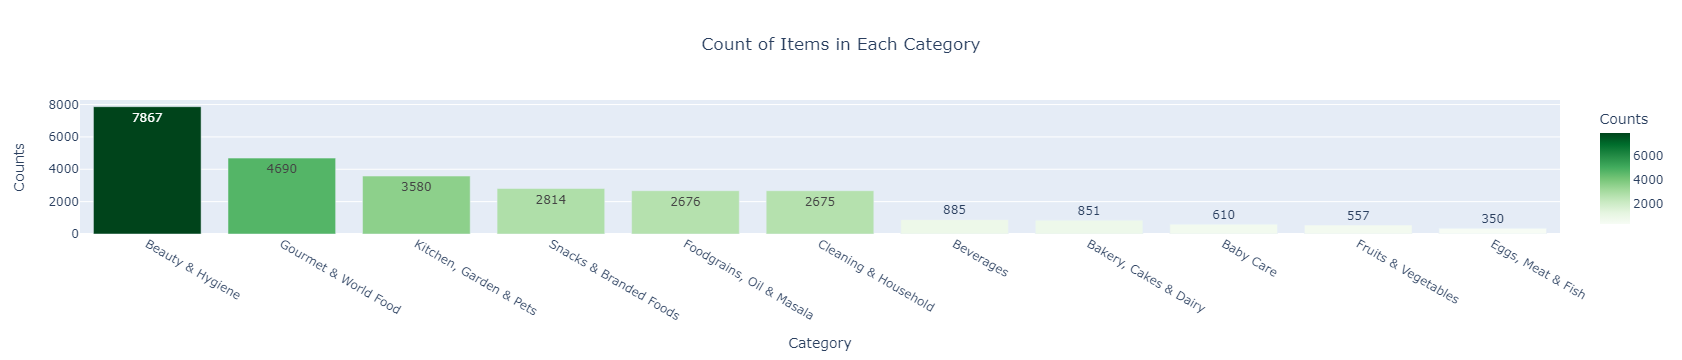

In [34]:
import plotly.express as px

# Read the CSV file
counts_df = pd.read_csv(r'C:\Users\User\Desktop\Kaggle Chalenges\Bigbasket\BigBasket Products.csv')

# Use the 'value_counts' method to count the occurrences in the 'Category' column
category_counts = counts_df['category'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['Category', 'Counts']

# Create a bar chart
fig = px.bar(data_frame=category_counts,  # Use the DataFrame with counts
             x='Category',  # X-axis represents 'Category'
             y='Counts',  # Y-axis represents 'Counts'
             color='Counts',  # Color represents 'Counts'
             color_continuous_scale='greens',
             text='Counts',
             title='Count of Items in Each Category')

# Customize the X-axis
fig.update_xaxes(categoryorder='total descending')

# Set the title and make it bold and centered
fig.update_layout(
    title='Count of Items in Each Category',
    title_x=0.5)  # Center the title
    #title_font=dict(size=16, family="Arial, bold"))  # Set the font size and make it bold
 
    

# Show the bar chart
fig.show()
